<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/Air_Passengers_Predication_using_RNN_%26_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [110]:
dataset = pd.read_csv('/content/AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [111]:
dataset = dataset['#Passengers']
dataset.head()

0    112
1    118
2    132
3    129
4    121
Name: #Passengers, dtype: int64

In [0]:
dataset = np.array(dataset).reshape(-1, 1)

In [113]:
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

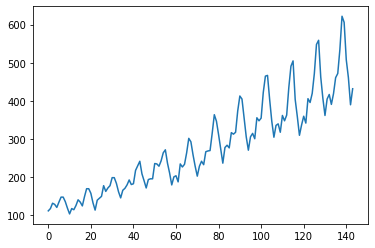

In [114]:
plt.plot(dataset)

In [115]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [0]:
train_size = 100
test_size = 44

In [0]:
train = dataset[0:train_size, :]
test = dataset[train_size:144, :]

In [118]:
train.shape, test.shape

((100, 1), (44, 1))

In [0]:
def get_data(dataset, look_back):
  dataX, dataY = [],[]
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
look_back =1
X_train, y_train =get_data(train, look_back)

In [121]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [122]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [0]:
X_test, y_test =get_data(test, look_back)

In [124]:
X_test

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919]])

In [125]:
y_test

array([0.61389961, 0.6969112 , 0.7007722 , 0.57915058, 0.46911197,
       0.38803089, 0.44787645, 0.45559846, 0.41312741, 0.4980695 ,
       0.47104247, 0.5       , 0.63899614, 0.74710425, 0.77413127,
       0.57915058, 0.49227799, 0.3976834 , 0.44980695, 0.49420849,
       0.45945946, 0.58301158, 0.56370656, 0.61003861, 0.71042471,
       0.85714286, 0.87837838, 0.69305019, 0.58494208, 0.4980695 ,
       0.58108108, 0.6042471 , 0.55405405, 0.60810811, 0.68918919,
       0.71042471, 0.83204633, 1.        , 0.96911197, 0.77992278,
       0.68918919, 0.55212355])

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1 )
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1 )

In [127]:
X_train.shape, X_test.shape

((98, 1, 1), (42, 1, 1))

**Build Model**

In [0]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [129]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0377
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 4/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 13/50
98/98 [==============================

In [0]:
y_pred = model.predict(X_test)

In [132]:
y_pred

array([[0.4757198 ],
       [0.6034658 ],
       [0.6841523 ],
       [0.6878688 ],
       [0.56932145],
       [0.4603948 ],
       [0.38005897],
       [0.43932444],
       [0.4469855 ],
       [0.40488043],
       [0.48912567],
       [0.46231046],
       [0.4910404 ],
       [0.628004  ],
       [0.73217016],
       [0.7577418 ],
       [0.56932145],
       [0.48338085],
       [0.3895985 ],
       [0.44123957],
       [0.485296  ],
       [0.45081648],
       [0.5731238 ],
       [0.5540935 ],
       [0.5996811 ],
       [0.6971437 ],
       [0.83487844],
       [0.8542427 ],
       [0.68043226],
       [0.57502425],
       [0.48912567],
       [0.5712229 ],
       [0.5939995 ],
       [0.54456216],
       [0.5977878 ],
       [0.6767088 ],
       [0.6971437 ],
       [0.8117939 ],
       [0.96195066],
       [0.93513185],
       [0.7631937 ],
       [0.6767088 ]], dtype=float32)

In [0]:
y_pred = scaler.inverse_transform(y_pred)

In [134]:
scaler.scale_

array([0.0019305])

In [0]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

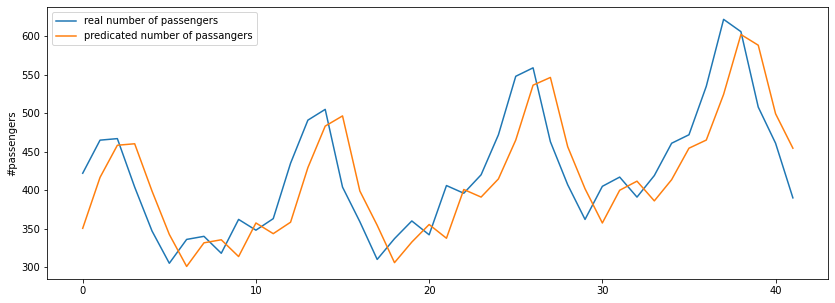

In [136]:
#plot baseline and Predications

plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicated number of passangers')
plt.ylabel('#passengers')
plt.legend()
plt.show()